<a href="https://colab.research.google.com/github/ogniandantchev/BG_ecdc_covid19_7daymean_chart/blob/main/ecdc_covid19_daily.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
sns.set_theme(style="whitegrid")

In [5]:
cases = pd.read_csv("https://opendata.ecdc.europa.eu/covid19/casedistribution/csv")

In [6]:
cases

,dateRep,year_week,cases_weekly,deaths_weekly,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,notification_rate_per_100000_population_14-days
0,25/01/2021,2021-03,713,43,Afghanistan,AF,AFG,38041757.0,Asia,3.34
1,18/01/2021,2021-02,557,45,Afghanistan,AF,AFG,38041757.0,Asia,3.24
2,11/01/2021,2021-01,675,71,Afghanistan,AF,AFG,38041757.0,Asia,4.15
3,04/01/2021,2020-53,902,60,Afghanistan,AF,AFG,38041757.0,Asia,7.61
4,28/12/2020,2020-52,1994,88,Afghanistan,AF,AFG,38041757.0,Asia,7.19
...,...,...,...,...,...,...,...,...,...,...
10214,20/04/2020,2020-16,11,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,0.11
10215,13/04/2020,2020-15,5,2,Zimbabwe,ZW,ZWE,14645473.0,Africa,0.05
10216,06/04/2020,2020-14,2,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,0.05
10217,30/03/2020,2020-13,5,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,0.05


In [7]:
bg= cases[cases.geoId == "BG"]

In [8]:
data= bg.drop(columns=["year_week", "countriesAndTerritories",	"geoId",	"countryterritoryCode",	"popData2019",	"continentExp",	"notification_rate_per_100000_population_14-days",])

In [9]:
 data.dateRep= pd.to_datetime(data.dateRep, dayfirst=True)

In [10]:
data.sort_values(by=["dateRep"], inplace=True)

In [11]:
data

,dateRep,cases_weekly,deaths_weekly
1508,2020-03-09,4,0
1507,2020-03-16,47,2
1506,2020-03-23,134,1
1505,2020-03-30,161,5
1504,2020-04-06,185,12
1503,2020-04-13,144,9
1502,2020-04-20,240,14
1501,2020-04-27,385,13
1500,2020-05-04,318,17
1499,2020-05-11,347,18


In [12]:
data.set_index('dateRep', drop=True, inplace=True) 

In [ ]:
#data['cases'] = data['cases'].fillna(0)
#data['deaths'] = data['deaths'].fillna(0)

In [13]:
data = data.rolling(7).mean()

In [14]:
data

,cases_weekly,deaths_weekly
dateRep,,
2020-03-09,NaN,NaN
2020-03-16,NaN,NaN
2020-03-23,NaN,NaN
2020-03-30,NaN,NaN
2020-04-06,NaN,NaN
2020-04-13,NaN,NaN
2020-04-20,130.714286,6.142857
2020-04-27,185.142857,8.000000
2020-05-04,223.857143,10.142857


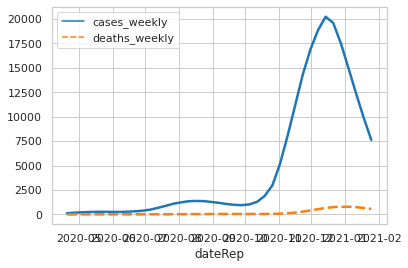

In [15]:
sns.lineplot(data=data, palette="tab10", linewidth=2.5)

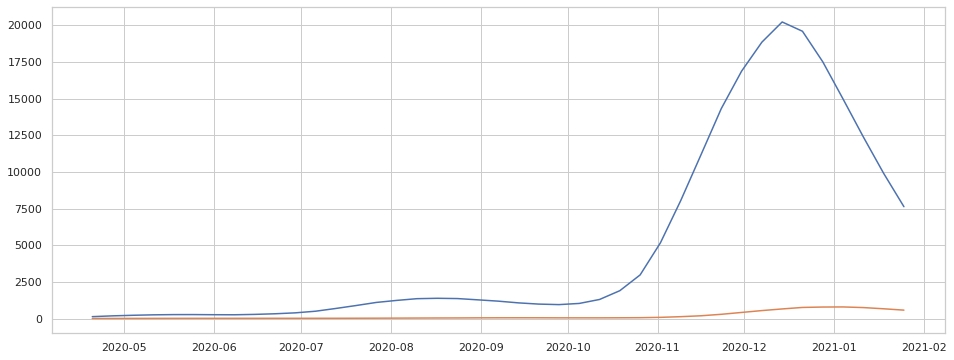

In [16]:
plt.figure(figsize=(16,6))
plt.plot(data)

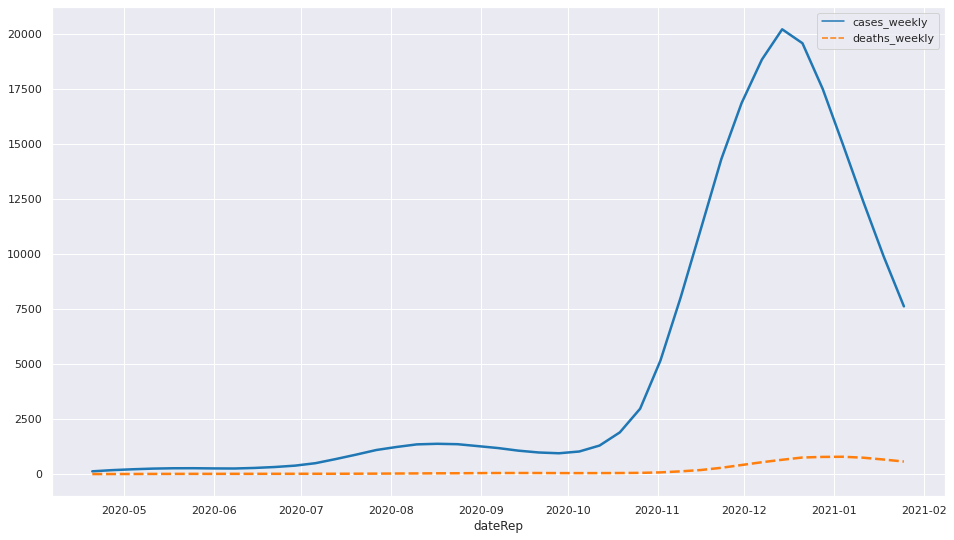

In [17]:
sns.set(rc={'figure.figsize':(16,9)})
sns.lineplot(data=data, palette="tab10", linewidth=2.5)
